#### Problem Statement:

A bank is currently analysing their customer churn historic data and is interested to use 
machine learning models to predict churn rates for future customer. They've historic data of 
customers how have exited from their services. 
They've reached out to you as a solution consultant to help them solve this issue and build a 
robust model to predictive model to help them identify churning customers. Also compare the 
model performance across other algorithms as well.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn  import metrics

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Data Inspection

In [2]:
df = pd.read_csv('Bank Customer Historic Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* __no missing values are there in the dataset__

In [4]:
print('Number of Categorical Features: ', df.select_dtypes('object').shape[1])
print('*' * 50)
print('Number of Numerical Features: ', df.select_dtypes(exclude = 'object').shape[1])

Number of Categorical Features:  3
**************************************************
Number of Numerical Features:  11


### Explanatory Data Analysis

Credit Score range: 350 - 850.


<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

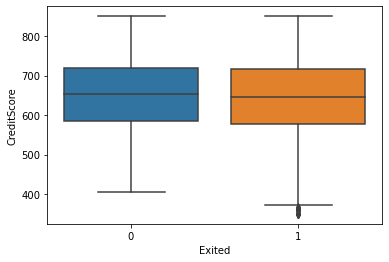

In [5]:
credit_score_min = df['CreditScore'].min()
credit_score_max = df['CreditScore'].max()
print(f'Credit Score range: {credit_score_min} - {credit_score_max}.')
sns.boxplot(x='Exited', y='CreditScore', data=df)

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

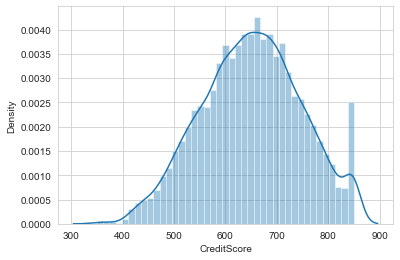

In [6]:
sns.set_style('whitegrid')
sns.distplot(df['CreditScore'])

<AxesSubplot:xlabel='Geography', ylabel='count'>

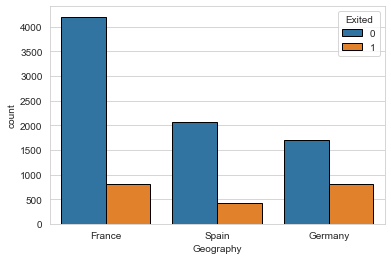

In [7]:
sns.countplot('Geography', data = df, hue = 'Exited', edgecolor = 'black')

In [8]:
print('Geography distribution (%) :')
(df['Geography'].value_counts()/df.shape[0]) * 100

Geography distribution (%) :


France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

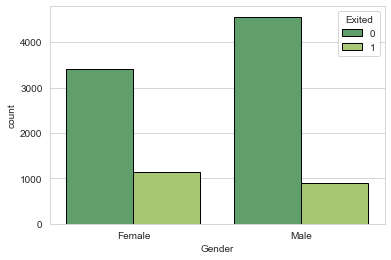

In [9]:
sns.countplot('Gender', data = df, hue = 'Exited', edgecolor = 'black', palette = 'summer')

In [10]:
print('Gender distribution (%) :')
(df['Gender'].value_counts()/df.shape[0]) * 100

Gender distribution (%) :


Male      54.57
Female    45.43
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Exited', ylabel='Age'>

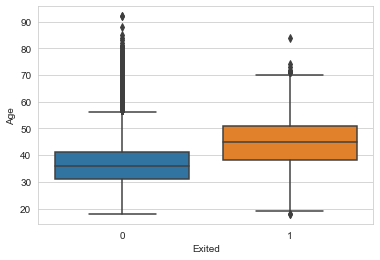

In [11]:
sns.boxplot(x='Exited', y='Age', data=df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

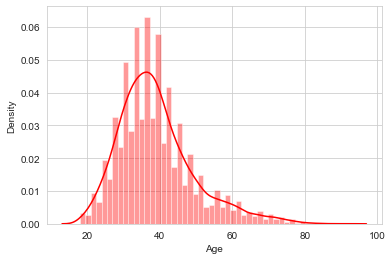

In [12]:
sns.set_style('whitegrid')
sns.distplot(df['Age'], color='r')

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

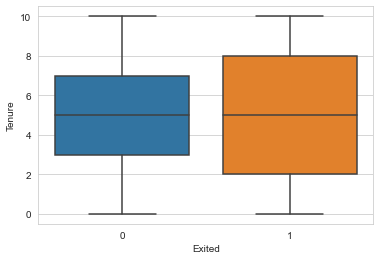

In [13]:
sns.boxplot(x='Exited', y='Tenure', data=df)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

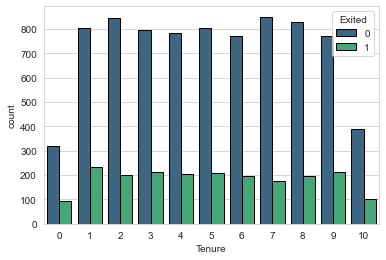

In [14]:
sns.countplot('Tenure', data=df, hue='Exited', edgecolor='black', palette='viridis')

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

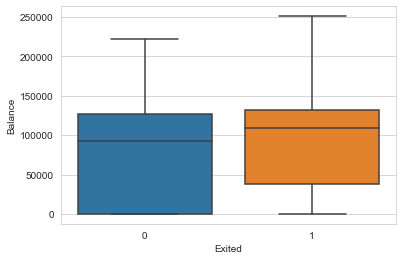

In [15]:
sns.boxplot(x='Exited', y='Balance', data=df)

<AxesSubplot:xlabel='Balance', ylabel='Density'>

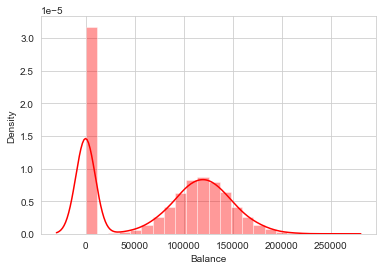

In [16]:
sns.set_style('whitegrid')
sns.distplot(df['Balance'], color='r')

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

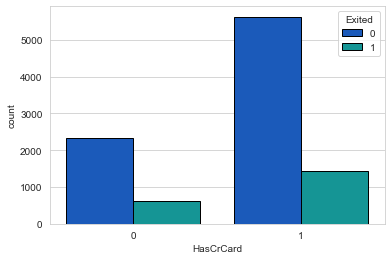

In [17]:
sns.countplot('HasCrCard', data = df, hue = 'Exited', edgecolor = 'black', palette = 'winter')

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

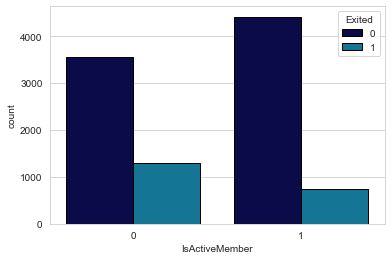

In [18]:
sns.countplot('IsActiveMember', data = df, hue = 'Exited', edgecolor = 'black', palette = 'ocean')

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

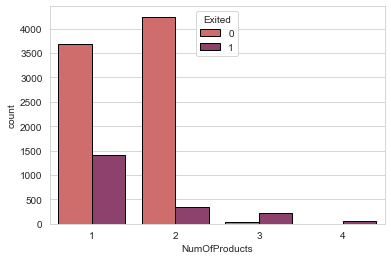

In [19]:
sns.countplot('NumOfProducts', data = df, hue = 'Exited', edgecolor = 'black', palette = 'flare')

In [20]:
df.groupby(["NumOfProducts","Exited"]).agg({"Exited":"count"})

Exited
NumOfProducts Exited        
1             0         3675
              1         1409
2             0         4242
              1          348
3             0           46
              1          220
4             1           60

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

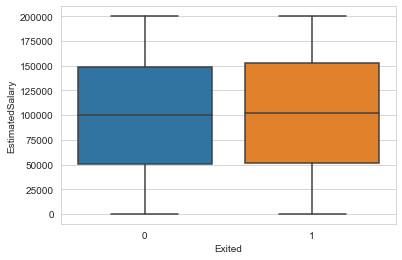

In [21]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

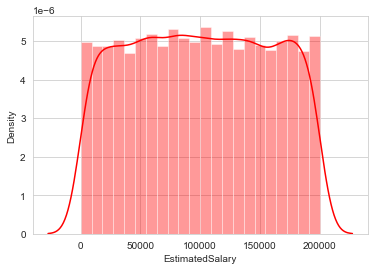

In [22]:
sns.set_style('whitegrid')
sns.distplot(df['EstimatedSalary'], color='r')

<AxesSubplot:xlabel='Exited', ylabel='count'>

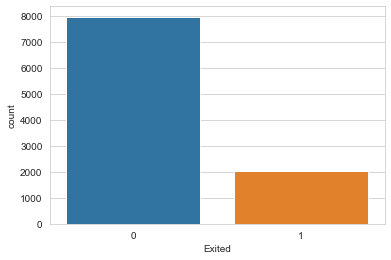

In [23]:
sns.countplot('Exited', data=df)

#### Is there any difference in exit rate between male and female? Let's find out..

In [24]:
print('Gender distribution (%) :')
(df['Gender'].value_counts()/df.shape[0]) * 100

Gender distribution (%) :


Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [25]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

Exit Rate of Male:
0    45.59
1     8.98
Name: Exited, dtype: float64


<AxesSubplot:xlabel='Exited', ylabel='count'>

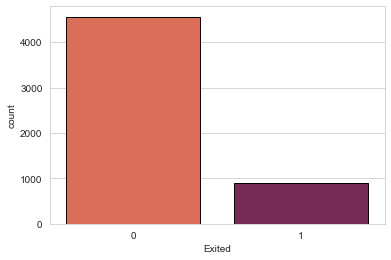

In [26]:
print('Exit Rate of Male:')
print(df_male['Exited'].value_counts()/df.shape[0] * 100)
sns.countplot('Exited', data=df_male, edgecolor='black', palette='rocket_r')

Exit Rate of Female:
0    34.04
1    11.39
Name: Exited, dtype: float64


<AxesSubplot:xlabel='Exited', ylabel='count'>

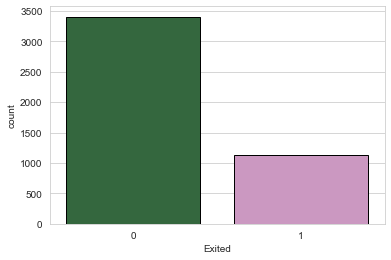

In [27]:
print('Exit Rate of Female:')
print(df_female['Exited'].value_counts()/df.shape[0] * 100)
sns.countplot('Exited', data=df_female, edgecolor='black', palette='cubehelix')

* __The exit rate of `Male` is 8.98% where as the axit rate of `female` is 11.39%.__ 

### Data Preparation for model

In [28]:
final = df.drop(['RowNumber', 'CustomerId'], axis=1)

In [29]:
t0 = final.copy()

In [30]:
t0.drop('Surname', axis=1, inplace=True)

In [31]:
t0['Gender'] = t0['Gender'].map({'Female':0, 'Male':1}).astype('int')

In [32]:
geography_dummies = pd.get_dummies(t0['Geography'], drop_first=True)
t0 = pd.concat([t0, geography_dummies] ,axis=1)
t0.drop('Geography', axis=1, inplace=True)

### Train-Test Split

In [33]:
t = t0
    
X= t.drop(columns = ['Exited'], axis=1)
y= t['Exited']

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=21)
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((8000, 11), (2000, 11), (8000,), (2000,))

## ML Model

### * Logistic Regression

In [34]:
lr = LogisticRegression().fit(X_train,y_train)
y_train_pred_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_valid)

print(f'Training={metrics.accuracy_score(y_train,y_train_pred_lr)},  Testing={metrics.accuracy_score(y_valid,y_pred_lr)}')

Training=0.790375,  Testing=0.7865


<AxesSubplot:>

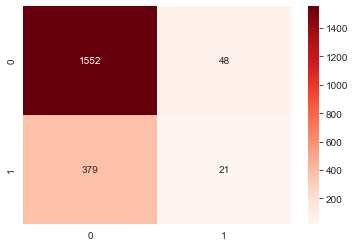

In [35]:
sns.heatmap(metrics.confusion_matrix(y_valid,y_pred_lr), annot=True,fmt='', cmap='Reds')

In [36]:
print('ROC Score: ',metrics.roc_auc_score(y_valid, y_pred_lr))

CR_lr = metrics.classification_report(y_valid, y_pred_lr)
print(CR_lr)

ROC Score:  0.51125
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1600
           1       0.30      0.05      0.09       400

    accuracy                           0.79      2000
   macro avg       0.55      0.51      0.48      2000
weighted avg       0.70      0.79      0.72      2000



### * Random Forest

In [37]:
rf = RandomForestClassifier().fit(X_train,y_train)
y_train_pred_rf = rf.predict(X_train)
y_pred_rf = rf.predict(X_valid)

print(f'Training={metrics.accuracy_score(y_train,y_train_pred_rf)},  Testing={metrics.accuracy_score(y_valid,y_pred_rf)}')

Training=0.999875,  Testing=0.86


<AxesSubplot:>

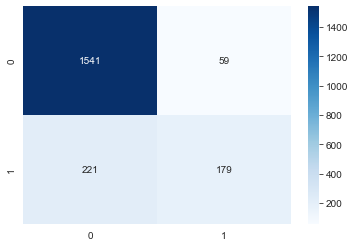

In [38]:
sns.heatmap(metrics.confusion_matrix(y_valid,y_pred_rf), annot=True,fmt='', cmap='Blues')

<BarContainer object of 11 artists>

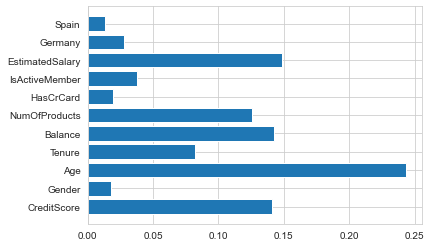

In [39]:
plt.barh(X_train.columns, rf.feature_importances_)

In [40]:
print('ROC Score: ',metrics.roc_auc_score(y_valid, y_pred_rf))

CR_rf = metrics.classification_report(y_valid, y_pred_rf)
print(CR_rf)

ROC Score:  0.7053125
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1600
           1       0.75      0.45      0.56       400

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



### * XGBoost

In [41]:
xg = XGBClassifier(learning_rate = 0.05, max_depth=4, eval_metric='rmse').fit(X_train,y_train)
y_train_pred_xg = xg.predict(X_train)
y_pred_xg = xg.predict(X_valid)

print(f'Training={metrics.accuracy_score(y_train,y_train_pred_xg)},  Testing={metrics.accuracy_score(y_valid,y_pred_xg)}')

Training=0.870375,  Testing=0.863


<AxesSubplot:>

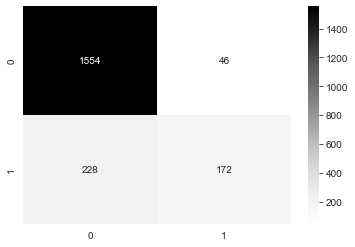

In [42]:
sns.heatmap(metrics.confusion_matrix(y_valid,y_pred_xg), annot=True,fmt='', cmap='Greys')

<BarContainer object of 11 artists>

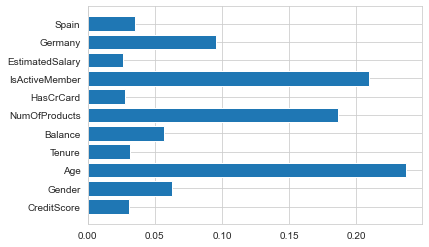

In [43]:
plt.barh(X_train.columns, xg.feature_importances_)

In [44]:
print('ROC Score: ',metrics.roc_auc_score(y_valid, y_pred_xg))

CR_xg = metrics.classification_report(y_valid, y_pred_xg)
print(CR_xg)

ROC Score:  0.7006249999999999
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1600
           1       0.79      0.43      0.56       400

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.86      0.86      0.85      2000



### * LightGBM

In [45]:
lgbm = LGBMClassifier(learning_rate = 0.05).fit(X_train,y_train)
y_train_pred_lgbm = lgbm.predict(X_train)
y_pred_lgbm = lgbm.predict(X_valid)

print(f'Training={metrics.accuracy_score(y_train,y_train_pred_lgbm)},  Testing={metrics.accuracy_score(y_valid,y_pred_lgbm)}')

Training=0.892875,  Testing=0.8645


<AxesSubplot:>

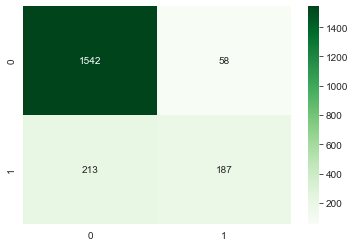

In [46]:
sns.heatmap(metrics.confusion_matrix(y_valid,y_pred_lgbm), annot=True,fmt='', cmap='Greens')

<BarContainer object of 11 artists>

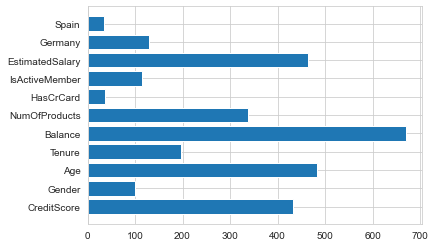

In [47]:
plt.barh(X_train.columns, lgbm.feature_importances_)

In [48]:
print('ROC Score: ',metrics.roc_auc_score(y_valid, y_pred_lgbm))

CR_lgbm = metrics.classification_report(y_valid, y_pred_lgbm)
print(CR_lgbm)

ROC Score:  0.715625
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1600
           1       0.76      0.47      0.58       400

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000

